In [1]:
import gseapy as gp
import scanpy as sc 
import seaborn as sns

In [2]:
adata_tf = sc.read_h5ad('TFvelo_revealing/rc.h5ad')
adata_inter = sc.read_h5ad('TFvelo_revealing/Intervelo.h5ad')
print(adata_tf)
print(adata_inter)

AnnData object with n_obs × n_vars = 3696 × 2000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size_total', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime'
    var: 'highly_variable_genes', 'n_cells', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'n_TFs', 'fit_alpha', 'fit_beta', 'fit_omega', 'fit_theta', 'fit_gamma', 'fit_delta', 'fit_likelihood', 'fit_varx', 'fit_scaling_y', 'min_loss', 'non_blank_gene'
    uns: 'all_TFs', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'genes_all', 'genes_pp', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'TFs', 'TFs_correlation', 'TFs_id', 'TFs_times', 'fit_scaling', 'fit_weights', 'fit_weights_final', 'fit_weights_init', 'knockTF_Log2FC', 'loss'
    layers: 'M_total', '

In [3]:
msigdb = gp.Msigdb()
msigdb.list_dbver()

,Name,Last modified
0,6.0,2018-12-17 16:29
1,6.1,2018-12-17 16:29
2,6.2,2018-12-17 16:29
3,7.0,2020-01-27 04:43
4,7.1,2020-03-30 16:55
5,7.2,2020-09-18 23:33
6,7.3,2021-03-22 15:09
7,7.4,2021-04-02 14:38
8,7.5.1,2023-03-09 19:38
9,7.5,2022-01-13 01:00


In [7]:
msigdb.list_category(dbver="2025.1.Hs")

['c1.all',
 'c2.all',
 'c2.cgp',
 'c2.cp.biocarta',
 'c2.cp.kegg_legacy',
 'c2.cp.kegg_medicus',
 'c2.cp.pid',
 'c2.cp.reactome',
 'c2.cp',
 'c2.cp.wikipathways',
 'c3.all',
 'c3.mir.mir_legacy',
 'c3.mir.mirdb',
 'c3.mir',
 'c3.tft.gtrd',
 'c3.tft.tft_legacy',
 'c3.tft',
 'c4.3ca',
 'c4.all',
 'c4.cgn',
 'c4.cm',
 'c5.all',
 'c5.go.bp',
 'c5.go.cc',
 'c5.go.mf',
 'c5.go',
 'c5.hpo',
 'c6.all',
 'c7.all',
 'c7.immunesigdb',
 'c7.vax',
 'c8.all',
 'h.all',
 'msigdb']

In [4]:
gmt = msigdb.get_gmt(category='c5.go.bp', dbver="2025.1.Hs")


In [13]:
[i for i in gmt.keys() if ('PANCREAS' in i.upper() )]

['GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT',
 'GOBP_EXOCRINE_PANCREAS_DEVELOPMENT',
 'GOBP_PANCREAS_DEVELOPMENT']

In [15]:

[i for i in gmt.keys() if ('STEM_CELL_DIFFERENTIATION' in i.upper() )]

['GOBP_HEMATOPOIETIC_STEM_CELL_DIFFERENTIATION',
 'GOBP_MESENCHYMAL_STEM_CELL_DIFFERENTIATION',
 'GOBP_NEGATIVE_REGULATION_OF_HEMATOPOIETIC_STEM_CELL_DIFFERENTIATION',
 'GOBP_NEGATIVE_REGULATION_OF_STEM_CELL_DIFFERENTIATION',
 'GOBP_POSITIVE_REGULATION_OF_MESENCHYMAL_STEM_CELL_DIFFERENTIATION',
 'GOBP_POSITIVE_REGULATION_OF_STEM_CELL_DIFFERENTIATION',
 'GOBP_REGULATION_OF_HEMATOPOIETIC_STEM_CELL_DIFFERENTIATION',
 'GOBP_REGULATION_OF_MESENCHYMAL_STEM_CELL_DIFFERENTIATION',
 'GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION',
 'GOBP_STEM_CELL_DIFFERENTIATION']

In [6]:
pathway_list = [
    'GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT',
    'GOBP_EXOCRINE_PANCREAS_DEVELOPMENT',
    'GOBP_PANCREAS_DEVELOPMENT', 
    'GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION',
    'GOBP_STEM_CELL_DIFFERENTIATION',
]

In [5]:
import pandas as pd

In [24]:
gmt['GOBP_PANCREAS_DEVELOPMENT']

['ACVR2B',
 'AKT1',
 'ALDH1A2',
 'BAD',
 'BAK1',
 'BHLHA15',
 'BMAL1',
 'BMP4',
 'BMP5',
 'BMP6',
 'CCDC39',
 'CCDC40',
 'CDH2',
 'CDK6',
 'CELA1',
 'CLOCK',
 'CTNNB1',
 'DLL1',
 'DNAAF1',
 'EIF2AK3',
 'FGF10',
 'FOXA2',
 'FOXF1',
 'GATA6',
 'GDF11',
 'GIP',
 'GIPR',
 'GSK3A',
 'GSK3B',
 'HES1',
 'HNF1A',
 'HNF1B',
 'IER3IP1',
 'IGF1',
 'IGF2',
 'IHH',
 'IL6',
 'IL6R',
 'ILDR2',
 'INSM1',
 'INSR',
 'ISL1',
 'MEIS2',
 'MET',
 'MIR541',
 'MNX1',
 'NEUROD1',
 'NKX2-2',
 'NKX3-2',
 'NKX6-1',
 'NKX6-2',
 'NPHP3',
 'NR5A2',
 'ONECUT1',
 'ONECUT2',
 'PAX4',
 'PAX6',
 'PDPK1',
 'PDX1',
 'PROX1',
 'PTF1A',
 'RBM4',
 'RFX3',
 'RFX6',
 'RHEB',
 'SELENOT',
 'SHH',
 'SIDT2',
 'SMAD2',
 'SMO',
 'SOX4',
 'SOX9',
 'SRP54',
 'TCF7L2',
 'WFS1',
 'WLS',
 'WNT5A',
 'XBP1',
 'ZIC3',
 'ZNF800',
 'ZNF808']

In [35]:
len(set(gmt['GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION']).intersection(set(adata_tf.var_names)))

13

In [7]:
import scvelo as scv

In [32]:
scv.datasets.pancreas().shape

(3696, 27998)

## GSVA

In [13]:
gsva_tf = gp.gsva(
    data=pd.DataFrame(
        adata_tf.X.toarray().T if hasattr(adata_tf.X, 'toarray') else adata_tf.X.T,
        index=adata_tf.var_names,
        columns=adata_tf.obs_names
    ),
    gene_sets={i: gmt[i] for i in pathway_list},
    outdir=None,
    min_size=10
)

In [14]:
gsva_tf.res2d.pivot(index='Term', columns='Name', values='ES').head()

Name,AAACCTGAGAGGGATA,AAACCTGAGCCTTGAT,AAACCTGAGGCAATTA,AAACCTGCATCATCCC,AAACCTGGTAAGTGGC,AAACCTGGTATTAGCC,AAACCTGTCCCTCTTT,AAACCTGTCTTTCCTC,AAACGGGAGACAATAC,AAACGGGAGATATGGT,...,TTTGGTTCACCAGATT,TTTGGTTCACGAAGCA,TTTGGTTTCACTTACT,TTTGGTTTCCTTTCGG,TTTGTCAAGAATGTGT,TTTGTCAAGTGACATA,TTTGTCAAGTGTGGCA,TTTGTCAGTTGTTTGG,TTTGTCATCGAATGCT,TTTGTCATCTGTTTGT
Term,,,,,,,,,,,,,,,,,,,,,
GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT,0.271919,-0.35949,0.076041,-0.223844,0.33868,-0.128584,-0.434429,-0.160208,-0.43531,-0.104335,...,-0.157896,0.125911,-0.172664,0.017886,0.28946,0.400898,0.048161,-0.187303,-0.198403,-0.205921
GOBP_PANCREAS_DEVELOPMENT,0.095439,-0.254561,-0.001042,-0.196903,0.11596,-0.089805,-0.220583,-0.161871,-0.378772,-0.17606,...,-0.196755,0.128474,-0.28758,-0.01494,0.156623,0.246608,-0.161359,-0.114314,-0.23471,-0.003169
GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION,-0.507268,-0.043776,-0.14714,0.543908,0.171084,0.300361,-0.150483,-0.004913,0.626956,0.154718,...,0.177769,-0.136172,-0.177013,-0.08981,-0.45007,-0.496967,0.005142,0.425356,-0.400309,-0.459453
GOBP_STEM_CELL_DIFFERENTIATION,-0.264804,0.084015,0.068274,0.092861,-0.089029,0.167285,-0.194539,0.025043,0.361852,0.166598,...,0.193502,-0.069431,-0.087797,0.055618,-0.027156,-0.125015,-0.196468,0.1026,-0.171858,-0.235408


In [15]:
gsva_tf_df = gsva_tf.res2d.pivot(index='Term', columns='Name', values='ES').T
gsva_tf_df

Term,GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT,GOBP_PANCREAS_DEVELOPMENT,GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION,GOBP_STEM_CELL_DIFFERENTIATION
Name,,,,
AAACCTGAGAGGGATA,0.271919,0.095439,-0.507268,-0.264804
AAACCTGAGCCTTGAT,-0.35949,-0.254561,-0.043776,0.084015
AAACCTGAGGCAATTA,0.076041,-0.001042,-0.14714,0.068274
AAACCTGCATCATCCC,-0.223844,-0.196903,0.543908,0.092861
AAACCTGGTAAGTGGC,0.33868,0.11596,0.171084,-0.089029
...,...,...,...,...
TTTGTCAAGTGACATA,0.400898,0.246608,-0.496967,-0.125015
TTTGTCAAGTGTGGCA,0.048161,-0.161359,0.005142,-0.196468
TTTGTCAGTTGTTTGG,-0.187303,-0.114314,0.425356,0.1026


In [16]:
import scipy.stats as stats

In [17]:
spearman_results_tf = [
    stats.spearmanr(gsva_tf_df[col], adata_tf.obs['velocity_pseudotime'])
    for col in gsva_tf_df.columns
]
spearman_result_tf_df = pd.DataFrame([(spearman_result[0], spearman_result[1]) for spearman_result in spearman_results_tf], 
                                 index=gsva_tf_df.columns, columns=['spearman', 'p-value'])
spearman_result_tf_df

,spearman,p-value
Term,,
GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT,0.199339,1.955791e-34
GOBP_PANCREAS_DEVELOPMENT,0.427743,2.487977e-164
GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION,-0.812653,0.000000e+00
GOBP_STEM_CELL_DIFFERENTIATION,-0.714665,0.000000e+00


In [18]:
gsva_inter = gp.gsva(
    data=pd.DataFrame(
        adata_inter.X.toarray().T if hasattr(adata_inter.X, 'toarray') else adata_inter.X.T,
        index=adata_inter.var_names,
        columns=adata_inter.obs_names
    ),
    gene_sets={i: gmt[i] for i in pathway_list},
    outdir=None,
    min_size=10
)

gsva_inter_df = gsva_inter.res2d.pivot(index='Term', columns='Name', values='ES').T

spearman_results_inter = [
    stats.spearmanr(gsva_inter_df[col], adata_inter.obs['velocity_pseudotime'])
    for col in gsva_inter_df.columns
]
spearman_result_inter_df = pd.DataFrame([(spearman_result[0], spearman_result[1]) for spearman_result in spearman_results_inter], 
                                 index=gsva_inter_df.columns, columns=['spearman', 'p-value'])
spearman_result_inter_df

,spearman,p-value
Term,,
GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT,-0.010262,5.328537e-01
GOBP_PANCREAS_DEVELOPMENT,0.238585,5.337201e-49
GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION,-0.797987,0.000000e+00
GOBP_STEM_CELL_DIFFERENTIATION,-0.756361,0.000000e+00


In [19]:
adata_my = sc.read_h5ad('TFvelo_revealing/Myvelo.h5ad')
gsva_my = gp.gsva(
    data=pd.DataFrame(
        adata_my.X.toarray().T if hasattr(adata_my.X, 'toarray') else adata_my.X.T,
        index=adata_my.var_names,
        columns=adata_my.obs_names
    ),
    gene_sets={i: gmt[i] for i in pathway_list},
    outdir=None,
    min_size=10
)

gsva_my_df = gsva_my.res2d.pivot(index='Term', columns='Name', values='ES').T

spearman_results_my = [
    stats.spearmanr(gsva_my_df[col], adata_my.obs['velocity_pseudotime'])
    for col in gsva_my_df.columns
]
spearman_result_my_df = pd.DataFrame([(spearman_result[0], spearman_result[1]) for spearman_result in spearman_results_my], 
                                 index=gsva_my_df.columns, columns=['spearman', 'p-value'])
spearman_result_my_df

,spearman,p-value
Term,,
GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT,0.048345,3.283923e-03
GOBP_PANCREAS_DEVELOPMENT,-0.077543,2.362019e-06
GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION,0.171983,6.237751e-26
GOBP_STEM_CELL_DIFFERENTIATION,0.113655,4.215104e-12


In [20]:
spearman_result_inter_df['algorithm'] = 'Intervelo'
spearman_result_inter_df

,spearman,p-value,algorithm
Term,,,
GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT,-0.010262,5.328537e-01,Intervelo
GOBP_PANCREAS_DEVELOPMENT,0.238585,5.337201e-49,Intervelo
GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION,-0.797987,0.000000e+00,Intervelo
GOBP_STEM_CELL_DIFFERENTIATION,-0.756361,0.000000e+00,Intervelo


In [23]:
spearman_result_inter_df['pathway'] = spearman_result_inter_df.index
spearman_result_inter_df

,spearman,p-value,algorithm,pathway
Term,,,,
GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT,-0.010262,5.328537e-01,Intervelo,GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT
GOBP_PANCREAS_DEVELOPMENT,0.238585,5.337201e-49,Intervelo,GOBP_PANCREAS_DEVELOPMENT
GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION,-0.797987,0.000000e+00,Intervelo,GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION
GOBP_STEM_CELL_DIFFERENTIATION,-0.756361,0.000000e+00,Intervelo,GOBP_STEM_CELL_DIFFERENTIATION


In [24]:
spearman_result_tf_df['algorithm'] = 'TFvelo'
spearman_result_tf_df['pathway'] = spearman_result_tf_df.index
spearman_result_my_df['algorithm'] = 'Myvelo'
spearman_result_my_df['pathway'] = spearman_result_my_df.index

In [25]:
df_melted = pd.concat([spearman_result_my_df, spearman_result_inter_df, spearman_result_tf_df], ignore_index=True)
df_melted

,spearman,p-value,algorithm,pathway
0,0.048345,3.283923e-03,Myvelo,GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT
1,-0.077543,2.362019e-06,Myvelo,GOBP_PANCREAS_DEVELOPMENT
2,0.171983,6.237751e-26,Myvelo,GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION
3,0.113655,4.215104e-12,Myvelo,GOBP_STEM_CELL_DIFFERENTIATION
4,-0.010262,5.328537e-01,Intervelo,GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT
5,0.238585,5.337201e-49,Intervelo,GOBP_PANCREAS_DEVELOPMENT
6,-0.797987,0.000000e+00,Intervelo,GOBP_REGULATION_OF_STEM_CELL_DIFFERENTIATION
7,-0.756361,0.000000e+00,Intervelo,GOBP_STEM_CELL_DIFFERENTIATION
8,0.199339,1.955791e-34,TFvelo,GOBP_ENDOCRINE_PANCREAS_DEVELOPMENT
9,0.427743,2.487977e-164,TFvelo,GOBP_PANCREAS_DEVELOPMENT


In [47]:
import matplotlib.pyplot as plt
import numpy as np

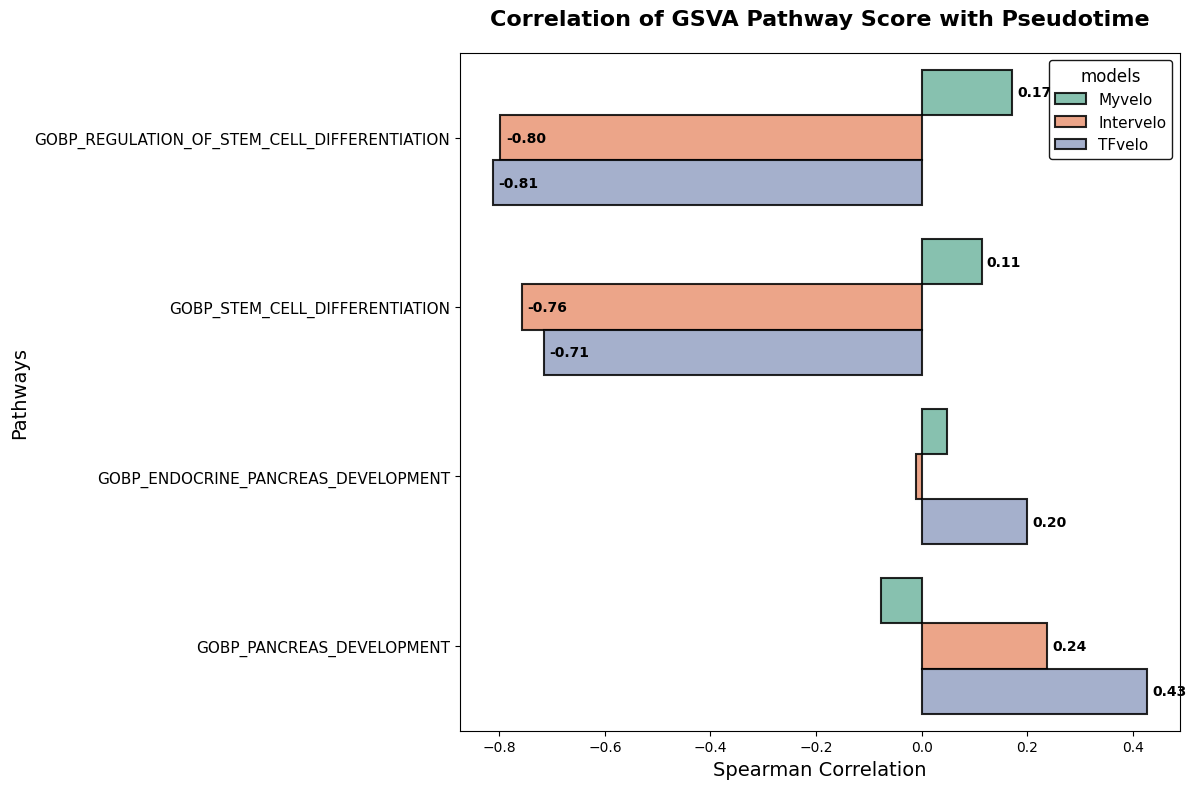

In [49]:
df_pivot = df_melted.pivot(index='pathway', columns='algorithm', values='spearman')

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values('total', ascending=True)
pathway_order_sorted = df_pivot.index

figs01 = plt.figure(figsize=(12, 8))

df_melted_sorted = df_melted.copy()
df_melted_sorted['pathway'] = pd.Categorical(df_melted_sorted['pathway'], 
                                            categories=pathway_order_sorted,
                                            ordered=True)

ax = sns.barplot(y='pathway', x='spearman', hue='algorithm', 
                 data=df_melted_sorted,
                 orient='h',
                 palette='Set2',
                 edgecolor='black',
                 linewidth=1.5,
                 alpha=0.85,
                 errcolor='none')

for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        if np.abs(width) > 0.1:
            ax.text(width + 0.01, 
                    bar.get_y() + bar.get_height()/2,  
                    f'{width:.2f}',
                    va='center',
                    fontsize=10,
                    fontweight='bold')

plt.title('Correlation of GSVA Pathway Score with Pseudotime',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Spearman Correlation', 
           fontsize=14, fontweight='medium')
plt.ylabel('Pathways', 
           fontsize=14, fontweight='medium')

# plt.xlim(0, 1.05)

plt.legend(title='models',
           title_fontsize=12,
           fontsize=11,
           frameon=True,
           framealpha=0.9,
           edgecolor='black',
           loc='upper right',
           # bbox_to_anchor=(1.0, 0.0)
          )

# ax.xaxis.grid(True, linestyle='--', alpha=0.3)
# ax.set_axisbelow(True)  

plt.yticks(fontsize=11, fontweight='medium')

plt.tight_layout()

figs01.savefig('figures/figs01.pdf', dpi=300, bbox_inches='tight')
plt.show()

## GSEA